<a href="https://colab.research.google.com/github/AymanMansur/Sales-Prediction-Using-XGBoost/blob/main/feature_engineering_retailer_h_247524021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Feature Engineering for Sales

***Import libraries***

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder

***Load file***

In [ ]:
file_path = '/content/drive/MyDrive/retailer dataset/modified_retailer_h_247524021.csv'
df = pd.read_csv(file_path)
df.sample(10)

,date,sales,holiday
56,2022-05-11,20936,0
484,2023-10-04,42594,0
433,2023-08-06,50992,0
843,2024-12-04,32197,0
21,2022-03-27,40234,0
306,2023-03-05,46599,0
401,2023-06-27,138479,1
741,2024-08-07,33616,0
475,2023-09-24,20367,0
450,2023-08-26,74136,1


***Convert to datetime and sort the date***

In [ ]:
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values('date')
df.head(20)

,date,sales,holiday
0,2022-03-02,60000,0
1,2022-03-03,59061,0
2,2022-03-05,50514,0
3,2022-03-06,41389,0
4,2022-03-07,39439,0
5,2022-03-08,51499,0
6,2022-03-09,40000,0
7,2022-03-10,67149,1
8,2022-03-12,57373,0
9,2022-03-13,41126,0


***Visualize the data***

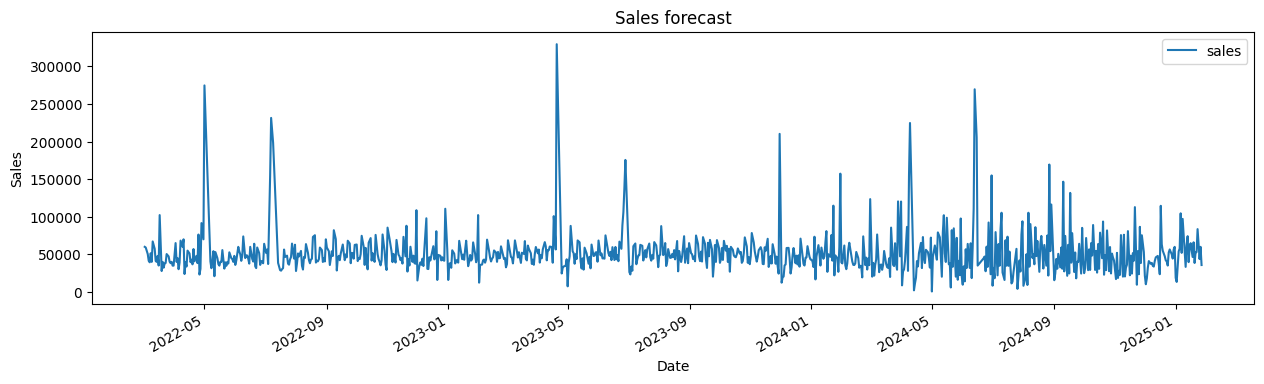

In [ ]:
df.plot(x='date', y = 'sales', kind='line', figsize=(15,4))
plt.xlabel("Date")
plt.ylabel("Sales")
plt.title("Sales forecast")
plt.show()

## **Date-based features**

**This code snippet is using Pandas to extract various components from a datetime column in a DataFrame and create new features that can be useful for analysis. Here’s a breakdown of each line:**

**Extracting the Year**

`Code: df['year'] = df['date'].dt.year`
Explanation: This line extracts the year component from each entry in the 'date' column and creates a new column called 'year'. The .dt accessor lets you access the datetime properties directly.
Extracting the Month

`Code: df['month'] = df['date'].dt.month`
Explanation: Similar to the year extraction, this line extracts the month (as an integer from 1 to 12) from the 'date' column and stores it in a new column named 'month'.
Extracting the Day

`Code: df['day'] = df['date'].dt.day`
Explanation: This extracts the day of the month (an integer between 1 and 31) from the datetime object and creates a 'day' column.
Extracting the Day of the Week

`Code: df['day_of_week'] = df['date'].dt.weekday` # Monday=0, Sunday=6
Explanation: Here, the code extracts the day of the week as an integer. The value ranges from 0 (Monday) to 6 (Sunday). This is useful for identifying patterns based on the day of the week.
Identifying Weekends

`Code: df['is_weekend'] = df['day_of_week'].apply(lambda x: 1 if x >= 4 else 0)`
Explanation: This line creates a new column 'is_weekend' that marks days as 1 if they fall on what the code considers the weekend, and 0 otherwise. The lambda function checks if the day of the week is greater than or equal to 4 (i.e., Friday, Saturday, and Sunday). Note that traditionally, weekends are Saturday (5) and Sunday (6), but here Friday (4) is also included, which might be intentional depending on the context.
Extracting the Quarter

`Code: df['quarter'] = df['date'].dt.quarter`
Explanation: This extracts the quarter (1 through 4) in which the date falls. It divides the year into four parts: Q1 (January-March), Q2 (April-June), Q3 (July-September), and Q4 (October-December).
Extracting the Week of the Year

`Code: df['week_of_year'] = df['date'].dt.isocalendar().week`
Explanation: This line calculates the week number of the year based on the ISO calendar. The .isocalendar() method returns an object with attributes for year, week, and weekday, and here the week number is assigned to a new column 'week_of_year'.

In [ ]:
# Create Date-Based Features
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['day_of_week'] = df['date'].dt.weekday  # Monday=0, Sunday=6
df['is_weekend'] = df['day_of_week'].apply(lambda x: 1 if x >= 4 else 0)
df['quarter'] = df['date'].dt.quarter
df['week_of_year'] = df['date'].dt.isocalendar().week


## **Lag Features**

**Lag features allow you to use past values of a variable as predictors for the current or future values. Here’s what each line does:**

`df['sales_lag_1'] = df['sales'].shift(1)`
This line creates a new column named sales_lag_1 that contains the value of sales from one period (or one row) before the current row.
Example: If today's sales are 100, then yesterday's sales (shifted by 1) might be 90, which will appear in the current row's sales_lag_1.

`df['sales_lag_7'] = df['sales'].shift(7)`
This line creates sales_lag_7 where each entry is the sales value from seven periods (rows) before.
Context: In a daily dataset, this typically represents the sales from the same day last week.

`df['sales_lag_30'] = df['sales'].shift(30)`
This creates sales_lag_30 by shifting the sales data by 30 periods, capturing the value 30 days ago (assuming daily data).

In [ ]:
# Create Lag Features
df['sales_lag_1'] = df['sales'].shift(1)
df['sales_lag_7'] = df['sales'].shift(7)
df['sales_lag_30'] = df['sales'].shift(30)


## **Rolling Window features**

**Rolling window features provide summary statistics over a specified window (or number of periods). They help smooth out short-term fluctuations and reveal trends or volatility.**

Rolling Mean Features:

`df['rolling_mean_7'] = df['sales'].rolling(window=7).mean()`
This computes the average sales over a rolling window of 7 periods. For each row, it calculates the mean of the current row and the previous 6 rows.
`df['rolling_mean_30'] = df['sales'].rolling(window=30).mean()`
This computes the average sales over a 30-period window, smoothing out the sales data over roughly a month if data is daily.
Rolling Standard Deviation Features:

`df['rolling_std_7'] = df['sales'].rolling(window=7).std()`
This calculates the standard deviation of sales over the last 7 periods. It measures the volatility or variability in sales during the past week.
`df['rolling_std_30'] = df['sales'].rolling(window=30).std()`
This computes the standard deviation over a 30-period window, providing insight into the monthly variability in sales.
How rolling windows work:
The .rolling(window=n) method creates a sliding window of size n that moves over the data. For each position, it computes the desired statistic (mean or standard deviation in this case) using the values within that window.

In [ ]:
# Create Rolling Window Features
df['rolling_mean_7'] = df['sales'].rolling(window=7).mean()
df['rolling_mean_30'] = df['sales'].rolling(window=30).mean()
df['rolling_std_7'] = df['sales'].rolling(window=7).std()
df['rolling_std_30'] = df['sales'].rolling(window=30).std()


## **Exponential Moving Average**

**Exponential Moving Averages smooth the data while giving more weight to recent observations. They are especially useful for identifying trends with reduced noise.**

`df['ema_7'] = df['sales'].ewm(span=7, adjust=False).mean()`

What It Does:
Computes the exponential moving average of the sales column over a span of 7 periods.
Details:
The span=7 parameter sets the smoothing window, meaning recent 7 observations influence the current EMA more than older values.
Setting adjust=False makes the calculation recursive, which is more efficient and often preferred in time series forecasting.
`df['ema_30'] = df['sales'].ewm(span=30, adjust=False).mean()`

What It Does:
Similar to the 7-day EMA, this calculates the exponential moving average over 30 periods.
Details:
This smoother trend reacts more slowly to recent changes, helping to capture longer-term trends compared to the shorter span EMA.

In [ ]:
# Create Exponential Moving Average (EMA)
df['ema_7'] = df['sales'].ewm(span=7, adjust=False).mean()
df['ema_30'] = df['sales'].ewm(span=30, adjust=False).mean()


## **Holidat Related Features**

**These lines add holiday context, which can be crucial for understanding anomalies or seasonal effects in sales data.**

`df['days_to_next_holiday'] = df['holiday'].shift(-1).fillna(0) * 1`

What It Does:
Shifts the holiday column upward by one row (using a negative shift), aligning the upcoming holiday value with the current row.
Details:
The .shift(-1) means that each row gets the value from the next row.
.fillna(0) replaces any missing values (which occur at the end of the dataset) with 0.
Multiplying by 1 can be used to ensure the data remains numeric (or to force a particular data type).
Interpretation:
This feature is intended to provide an indication of how close the next holiday is. The exact interpretation depends on what the holiday column originally represents (for example, it could be a marker or a precomputed countdown).
`df['days_since_last_holiday'] = df['holiday'].shift(1).fillna(0) * 1`

What It Does:
Shifts the holiday column downward by one row (using a positive shift) to align the most recent holiday with the current day.
Details:
Here, `.shift(1)` means the value from the previous row is used.
Again, `.fillna(0) `handles missing data (such as at the beginning of the dataset).
Multiplying by 1 maintains numeric consistency.
Interpretation:
This feature indicates how much time has passed since the last holiday, which can affect sales patterns.

In [ ]:
# Holiday-Related Features
df['days_to_next_holiday'] = df['holiday'].shift(-1).fillna(0) * 1
df['days_since_last_holiday'] = df['holiday'].shift(1).fillna(0) * 1


## **Sales Trend Features**

**These features capture changes in sales over different time intervals, helping to measure momentum or shifts in sales trends.**

`df['sales_diff_1'] = df['sales'] - df['sales'].shift(1)`

What It Does:
Calculates the difference between today’s sales and the previous day’s sales.
Details:
This simple differencing technique reveals the day-to-day change or jump in sales.
`df['sales_diff_7'] = df['sales'] - df['sales'].shift(7)`

What It Does:
Computes the difference between current sales and sales from 7 periods ago (typically the same day of the previous week for daily data).
Details:
This weekly difference helps capture longer-term changes or weekly seasonality.
`df['sales_momentum'] = df['sales_diff_7'] - df['sales_diff_1']`

What It Does:
Derives a momentum feature by subtracting the daily change from the weekly change.
Details:
A positive value may indicate accelerating sales growth over the week, while a negative value could suggest deceleration or even decline.
Interpretation:
This feature is designed to capture not only the change in sales but also the rate at which the change is occurring, offering insight into the momentum behind sales movements.

In [ ]:
# Sales Trend Features
df['sales_diff_1'] = df['sales'] - df['sales'].shift(1)
df['sales_diff_7'] = df['sales'] - df['sales'].shift(7)
df['sales_momentum'] = df['sales_diff_7'] - df['sales_diff_1']

# Drop rows with NaN values generated by shifting
df = df.dropna()


***display the updated dataframe***

In [ ]:
df

,date,sales,holiday,day_of_week_0,day_of_week_1,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5,day_of_week_6,...,rolling_mean_30,rolling_std_7,rolling_std_30,ema_7,ema_30,days_to_next_holiday,days_since_last_holiday,sales_diff_1,sales_diff_7,sales_momentum
30,2022-04-06,39008,0,False,False,True,False,False,False,False,...,45166.366667,11427.573229,14363.405178,40318.761679,45495.521556,1.0,0.0,8746.0,-1089.0,-9835.0
31,2022-04-07,68293,1,False,False,False,True,False,False,False,...,45474.100000,14790.229183,14764.652781,47312.321259,46966.326617,0.0,0.0,29285.0,33293.0,4008.0
32,2022-04-09,60000,0,False,False,False,False,False,True,False,...,45790.300000,14686.718109,14976.367460,50484.240944,47807.208771,1.0,1.0,-8293.0,25000.0,33293.0
33,2022-04-10,70000,1,False,False,False,False,False,False,True,...,46744.000000,15647.726847,15585.036710,55363.180708,49239.001753,0.0,0.0,10000.0,5000.0,-5000.0
34,2022-04-11,23866,0,True,False,False,False,False,False,False,...,46224.900000,18378.983566,16087.973258,47488.885531,47602.033898,0.0,1.0,-46134.0,-16134.0,30000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,2025-01-22,53039,0,False,False,True,False,False,False,False,...,53470.600000,9953.791118,18913.499234,53452.940588,53813.882652,1.0,0.0,505.0,13358.0,12853.0
886,2025-01-23,83565,1,False,False,False,True,False,False,False,...,54427.933333,14884.321225,19696.124656,60980.955441,55733.309577,0.0,0.0,30526.0,23565.0,-6961.0
887,2025-01-25,43718,0,False,False,False,False,False,True,False,...,54299.833333,15366.051019,19754.735860,56665.216581,54958.128314,0.0,1.0,-39847.0,-21159.0,18688.0
888,2025-01-26,60000,0,False,False,False,False,False,False,True,...,54894.900000,14989.746127,19644.635834,57498.912436,55283.410359,0.0,0.0,16282.0,13463.0,-2819.0


***save the new dataframe in a new file***

In [ ]:
df.to_csv('/content/drive/MyDrive/retailer dataset/extracted/extracted_features.csv',index=False)